In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../inputa/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


<a id="dataset-description"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>Quora Question Pairs: A Journey to Accurate Predictions</strong></font></h1>
<h2 align="center"><font color=#0277bd><strong>Exploring Solutions from Basics to Advanced Techniques</strong></font></h2>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
The goal of this competition is to predict which pairs of questions have the same meaning. The dataset's ground truth labels are based on human expert annotations, but as with any subjective process, there may be some noise and inconsistencies. While the labels are generally accurate, individual cases might still be subject to disagrem Quora.

This notebook will take you on a step-by-step journey, starting with a basic approach and gradually incorporating more advanced techniques:
<br><br>
1. **Basic Approach**: We will begin by implementing a simple solution using the Bag of Words (BoW) model and evaluate its accuracy.  
2. **Feature Engineering**: Next, we will explore some basic features to improve the model's performance.  
3. **Advanced Features**: Finally, we will enhance our solution with advanced features inspired by top solutions and insights from other notebooks.  

This structured progression will help us understand the impact of different techniques and gradually refine our predictions.  
<br><br>
If you find this notebook helpful and enjoy the structured approach, don't forget to **upvote**! Your support is greatly appreciated and motivates me to create more ins

D>Rahul>Nayakightful content.
</p>
</div>


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import zipfile
import pandas as pd

# Path to the zip file
zip_file_path = '/kaggle/input/quora-question-pairs/train.csv.zip'

# Destination folder where the unzipped files will be stored
destination_folder = '/kaggle/working/'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

# Path to the extracted CSV file
csv_file_path = destination_folder + 'train.csv'

# Reading the CSV file
df = pd.read_csv(csv_file_path)

# Display the dataframe
df.head()


id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [4]:
df=pd.read_csv('/kaggle/working/train.csv')

In [5]:
df.shape

(404290, 6)

In [6]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

# Initial EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

check if there is a row that is entired empty or not.

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


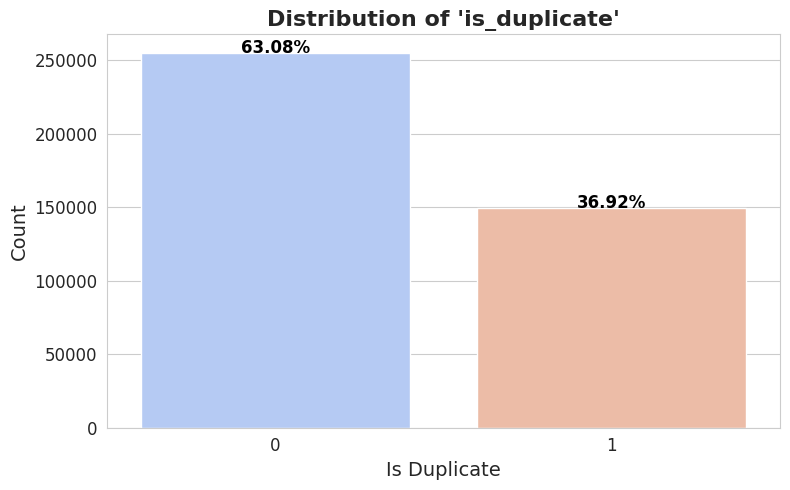

In [12]:
value_counts = df['is_duplicate'].value_counts()
percentages = (value_counts / df['is_duplicate'].count()) * 100

# Create a DataFrame for plotting
plot_data = value_counts.reset_index()
plot_data.columns = ['is_duplicate', 'count']
plot_data['percentage'] = percentages.values

# Set up the Seaborn style
sns.set_style('whitegrid')

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 5))
bar_plot = sns.barplot(
    x='is_duplicate', 
    y='count', 
    data=plot_data, 
    palette='coolwarm', 
    ax=ax
)

# Add percentages on top of the bars
for i, row in plot_data.iterrows():
    ax.text(
        x=i, 
        y=row['count'] + 0.2, 
        s=f"{row['percentage']:.2f}%", 
        ha='center', 
        fontsize=12, 
        color='black', 
        weight='bold'
    )

# Add titles and labels
ax.set_title("Distribution of 'is_duplicate'", fontsize=16, weight='bold')
ax.set_xlabel('Is Duplicate', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions:',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated:',x[x].shape[0])

Number of unique questions: 537929
Number of questions getting repeated: 111778


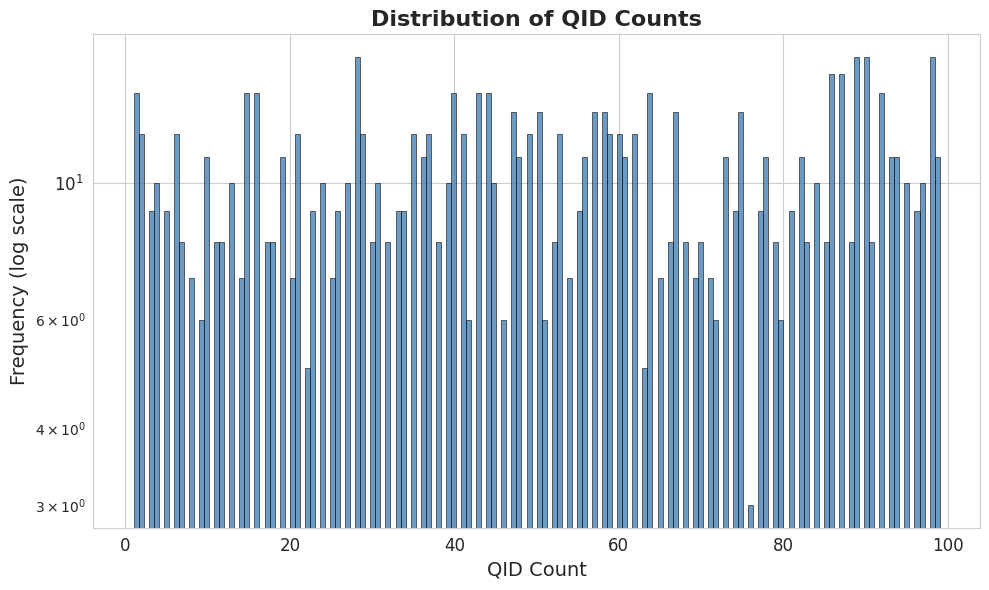

In [14]:

qid_counts = np.random.randint(1, 100, size=1000)  # Example: Random counts

# Set up the Seaborn style
sns.set_style('whitegrid')

# Create the histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(
    qid_counts,
    bins=160,
    color='steelblue',
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

# Apply logarithmic scale to the y-axis
ax.set_yscale('log')

# Add titles and labels
ax.set_title('Distribution of QID Counts', fontsize=16, weight='bold')
ax.set_xlabel('QID Count', fontsize=14)
ax.set_ylabel('Frequency (log scale)', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


<a id="basic-solution-bow"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>Basic Solution: Bag of Words (BoW)</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
In this section, we will implement a basic solution using the <strong>Bag of Words (BoW)</strong> approach. This is a simple and intuitive method where we represent each question as a vector of word counts. Here's what we'll do:
<br  <strong>No Preprocessing</strong>: For simplicity, we will skip any preprocessing of the text data (e.g., removing stop words, stemming, or lemmatization).  
ataseline.  

This approach is straightforward and helps us set a foundation for comparing future improvements. While the performance might not be optimal, it provides a starting point for building more sophisticated models in subsequent sections.
</p>
</div>


In [15]:
new_df=df.sample(30000)

In [16]:
new_df.head()

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   

                                                question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   

                                                question2  is_duplicate  
21096   Which types of equipment are used for powder c...             0  
346194  How can I win an argument in support of Donald...             0  
100652  What should I do if I don't want to be pessimi...             1  
56655   How has Quora implemented deep linking so well...             0  
209541           What are some words with the suffix -or?             0

In [17]:
ques_df=new_df[['question1','question2']]
ques_df

question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   
...                                                   ...   
297210                  How can I learn Chinese language?   
143902  How would I make Andy Warhol's outfit look mod...   
140790                     How do I get a book published?   
348339  Which is better to reduce weight? Aerobics or ...   
40899                  Why did Ash lose the Kalos league?   

                                                question2  
21096   Which types of equipment are used for powder c...  
346194  How can I win an argument in support of Donald...  
100652  What should I do if I don't want to be pessimi...  
56655   How has Quora implemented deep linking so well...  
209541           What are some words with the suffix -or?  
...                                                   ...  
297210  What are some good online tools for learning b...  
143902  How would I give Andy Warhol's outfit a modern...  
140790                How can a new writer get published?  
348339  Is it better to hit the gym or do yoga in orde...  
40899                           Who is Ash Ketchum's dad?  

[30000 rows x 2 columns]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Ensure ques_df is loaded with 'question1' and 'question2' columns
# ques_df = pd.read_csv('path_to_csv')

# Concatenate question1 and question2 side by side
questions = list(ques_df['question1']) + list(ques_df['question2'])

# Initialize CountVectorizer
cv = CountVectorizer(max_features=3000)

# Transform the questions
transformed_questions = cv.fit_transform(questions).toarray()

# Split the transformed data
q1_arr = transformed_questions[:len(ques_df)]
q2_arr = transformed_questions[len(ques_df):]

# Create DataFrames with matching indices
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)

# Concatenate the DataFrames along the columns
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

# Check the shape of the final DataFrame
print(temp_df.shape)


(30000, 6000)


In [19]:
temp_df

0     1     2     3     4     5     6     7     8     9     ...  2990  \
21096      0     0     0     0     0     0     0     0     0     0  ...     0   
346194     0     0     0     0     0     0     0     0     0     0  ...     0   
100652     0     0     0     0     0     0     0     0     0     0  ...     0   
56655      0     0     0     0     0     0     0     0     0     0  ...     0   
209541     0     0     0     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
297210     0     0     0     0     0     0     0     0     0     0  ...     0   
143902     0     0     0     0     0     0     0     0     0     0  ...     0   
140790     0     0     0     0     0     0     0     0     0     0  ...     0   
348339     0     0     0     0     0     0     0     0     0     0  ...     0   
40899      0     0     0     0     0     0     0     0     0     0  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
21096      0     0     0     0     0     0     0     0     0  
346194     0     0     0     0     0     0     0     0     0  
100652     0     0     0     0     0     0     0     0     0  
56655      0     0     0     0     0     0     0     0     0  
209541     0     0     0     0     0     0     0     0     0  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...  
297210     0     0     0     0     0     0     0     0     0  
143902     0     0     0     0     0     0     0     0     0  
140790     0     0     0     0     0     0     0     0     0  
348339     0     0     0     0     0     0     0     0     0  
40899      0     0     0     0     0     0     0     0     0  

[30000 rows x 6000 columns]

In [20]:
temp_df['is_duplicated']=new_df['is_duplicate']

In [21]:
temp_df.head()

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
21096   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
346194  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
100652  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
56655   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
209541  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        2997  2998  2999  is_duplicated  
21096      0     0     0              0  
346194     0     0     0              0  
100652     0     0     0              1  
56655      0     0     0              0  
209541     0     0     0              0  

[5 rows x 6001 columns]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.747

In [24]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7263333333333334

<a id="basic-solution-conclusion"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>Conclusion: Basic Solution Using BoW</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
Using the <strong>Bag of Words (BoW)</strong> representation without any preprocessing, we achieved an accuracy of approximately <strong>74%</strong> with a <strong>Random Forest</strong> model. While this is a decent starting point, there is still significant room for improvement. 
<br><br>
To enhance the performance, we will now explore adding <strong>basic features</strong> to the dataset. These features will help the model capture additional patterns and relationships, ultimately improving accuracy.
<br><br>
Let's proceed to the next section to see how basic feature engineering can boost our model's performance.
</p>
</div>


# BOW with basic features

In [25]:
new_df.head()

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   

                                                question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   

                                                question2  is_duplicate  
21096   Which types of equipment are used for powder c...             0  
346194  How can I win an argument in support of Donald...             0  
100652  What should I do if I don't want to be pessimi...             1  
56655   How has Quora implemented deep linking so well...             0  
209541           What are some words with the suffix -or?             0

In [26]:
new_df.shape

(30000, 6)

<a id="feature-engineering"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>Feature Engineering: Adding New Columns</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
In this section, we will create some additional features to enhance our model's performance. By adding these basic features, we aim to capture more meaningful patterns in the data and improve the model's accuracy. Here are the new columns we will introduce:
<br><br>
1. <strong>q1_len</strong>: Number of characters in <strong>question1</strong>.  
2. <strong>q2_len</strong>: Number of characters in <strong>question2</strong>.  
3. <strong>q1_num_words</strong>: Number of words in <strong>question1</strong>.  
4. <strong>q2_num_words</strong>: Number of words in <strong>question2</strong>.  
5. <strong>common_words</strong>: Number of common words between <strong>question1</strong> and <strong>question2</strong>.  
6. <strong>total_words</strong>: Total number of words in both <strong>question1</strong> and <strong>question2</strong>.  
7. <strong>word_share</strong>: Ratio of <strong>common_words</strong> to <strong>total_words</strong>.  

These features are designed to provide more context about the relationship between the two questions, and we believe they will help improve the model's accuracy. Let's add them to the dataset and evaluate their impact on the performance.
</p>
</div>


In [27]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [28]:
new_df.head()

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   

                                                question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   

                                                question2  is_duplicate  \
21096   Which types of equipment are used for powder c...             0   
346194  How can I win an argument in support of Donald...             0   
100652  What should I do if I don't want to be pessimi...             1   
56655   How has Quora implemented deep linking so well...             0   
209541           What are some words with the suffix -or?             0   

        q1_len  q2_len  
21096       53      61  
346194      55      53  
100652      33      51  
56655      131     185  
209541      63      40

In [29]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   

                                                question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   

                                                question2  is_duplicate  \
21096   Which types of equipment are used for powder c...             0   
346194  How can I win an argument in support of Donald...             0   
100652  What should I do if I don't want to be pessimi...             1   
56655   How has Quora implemented deep linking so well...             0   
209541           What are some words with the suffix -or?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
21096       53      61             9            10  
346194      55      53            11            11  
100652      33      51             6            11  
56655      131     185            23            35  
209541      63      40            12             8

In [30]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [31]:
new_df['common_words']=new_df.apply(common_words,axis=1)

In [32]:
new_df.head()

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   

                                                question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   

                                                question2  is_duplicate  \
21096   Which types of equipment are used for powder c...             0   
346194  How can I win an argument in support of Donald...             0   
100652  What should I do if I don't want to be pessimi...             1   
56655   How has Quora implemented deep linking so well...             0   
209541           What are some words with the suffix -or?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  
21096       53      61             9            10             5  
346194      55      53            11            11             4  
100652      33      51             6            11             3  
56655      131     185            23            35             6  
209541      63      40            12             8             3

In [33]:
new_df

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   
...        ...     ...     ...   
297210  297210   42970   20865   
143902  143902  227885  227886   
140790  140790   25923  223671   
348339  348339  476892  476893   
40899    40899   73937   73938   

                                                question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   
...                                                   ...   
297210                  How can I learn Chinese language?   
143902  How would I make Andy Warhol's outfit look mod...   
140790                     How do I get a book published?   
348339  Which is better to reduce weight? Aerobics or ...   
40899                  Why did Ash lose the Kalos league?   

                                                question2  is_duplicate  \
21096   Which types of equipment are used for powder c...             0   
346194  How can I win an argument in support of Donald...             0   
100652  What should I do if I don't want to be pessimi...             1   
56655   How has Quora implemented deep linking so well...             0   
209541           What are some words with the suffix -or?             0   
...                                                   ...           ...   
297210  What are some good online tools for learning b...             0   
143902  How would I give Andy Warhol's outfit a modern...             1   
140790                How can a new writer get published?             1   
348339  Is it better to hit the gym or do yoga in orde...             0   
40899                           Who is Ash Ketchum's dad?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  
21096       53      61             9            10             5  
346194      55      53            11            11             4  
100652      33      51             6            11             3  
56655      131     185            23            35             6  
209541      63      40            12             8             3  
...        ...     ...           ...           ...           ...  
297210      33      59             6            10             0  
143902      54      56            10            11             7  
140790      30      35             7             7             4  
348339      50      63             9            15             5  
40899       34      25             7             5             1  

[30000 rows x 11 columns]

In [34]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [35]:
new_df['total_words']=new_df.apply(total_words,axis=1)

In [36]:
new_df.head()

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   

                                                question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   

                                                question2  is_duplicate  \
21096   Which types of equipment are used for powder c...             0   
346194  How can I win an argument in support of Donald...             0   
100652  What should I do if I don't want to be pessimi...             1   
56655   How has Quora implemented deep linking so well...             0   
209541           What are some words with the suffix -or?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  total_words  
21096       53      61             9            10             5           19  
346194      55      53            11            11             4           21  
100652      33      51             6            11             3           16  
56655      131     185            23            35             6           48  
209541      63      40            12             8             3           19

In [37]:
new_df['word_share']=round(new_df['common_words']/new_df['total_words'],2)

In [38]:
new_df

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   
...        ...     ...     ...   
297210  297210   42970   20865   
143902  143902  227885  227886   
140790  140790   25923  223671   
348339  348339  476892  476893   
40899    40899   73937   73938   

                                                question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   
...                                                   ...   
297210                  How can I learn Chinese language?   
143902  How would I make Andy Warhol's outfit look mod...   
140790                     How do I get a book published?   
348339  Which is better to reduce weight? Aerobics or ...   
40899                  Why did Ash lose the Kalos league?   

                                                question2  is_duplicate  \
21096   Which types of equipment are used for powder c...             0   
346194  How can I win an argument in support of Donald...             0   
100652  What should I do if I don't want to be pessimi...             1   
56655   How has Quora implemented deep linking so well...             0   
209541           What are some words with the suffix -or?             0   
...                                                   ...           ...   
297210  What are some good online tools for learning b...             0   
143902  How would I give Andy Warhol's outfit a modern...             1   
140790                How can a new writer get published?             1   
348339  Is it better to hit the gym or do yoga in orde...             0   
40899                           Who is Ash Ketchum's dad?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  total_words  \
21096       53      61             9            10             5           19   
346194      55      53            11            11             4           21   
100652      33      51             6            11             3           16   
56655      131     185            23            35             6           48   
209541      63      40            12             8             3           19   
...        ...     ...           ...           ...           ...          ...   
297210      33      59             6            10             0           16   
143902      54      56            10            11             7           21   
140790      30      35             7             7             4           14   
348339      50      63             9            15             5           23   
40899       34      25             7             5             1           12   

        word_share  
21096         0.26  
346194        0.19  
100652        0.19  
56655         0.12  
209541        0.16  
...            ...  
297210        0.00  
143902        0.33  
140790        0.29  
348339        0.22  
40899         0.08  

[30000 rows x 13 columns]

In [39]:
new_df.describe()

id           qid1           qid2  is_duplicate  \
count   30000.000000   30000.000000   30000.000000  30000.000000   
mean   201664.309100  217267.637333  221067.179167      0.369367   
std    116736.189919  157940.515055  159406.953029      0.482641   
min         4.000000       9.000000      10.000000      0.000000   
25%    100484.000000   74836.250000   75660.250000      0.000000   
50%    201703.500000  192674.500000  198629.500000      0.000000   
75%    303494.000000  346932.750000  354044.000000      1.000000   
max    404284.000000  537926.000000  537927.000000      1.000000   

             q1_len        q2_len  q1_num_words  q2_num_words  common_words  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      59.549733     60.330833     10.949933     11.235933      4.493200   
std       30.131039     33.483325      5.475962      6.223988      3.103634   
min        3.000000      1.000000      1.000000      1.000000      0.000000   
25%       39.000000     39.000000      7.000000      7.000000      2.000000   
50%       52.000000     51.000000     10.000000     10.000000      4.000000   
75%       72.000000     72.000000     13.000000     13.000000      6.000000   
max      430.000000    823.000000     81.000000    149.000000     38.000000   

        total_words    word_share  
count  30000.000000  30000.000000  
mean      21.169033      0.221888  
std        8.600469      0.128306  
min        3.000000      0.000000  
25%       15.000000      0.120000  
50%       19.000000      0.210000  
75%       25.000000      0.320000  
max      117.000000      0.500000

# Analysis of features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


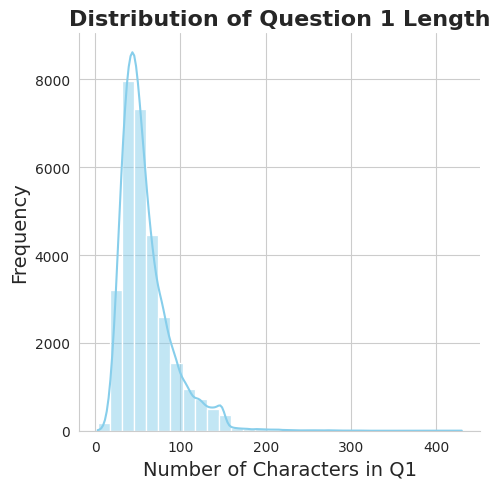

Minimum characters: 3
Maximum characters: 430
Average number of characters: 59


In [40]:
sns.set_style('whitegrid')  # Set the style for Seaborn
sns.displot(new_df['q1_len'], kde=True, bins=30, color='skyblue')

# Add titles and labels
plt.title('Distribution of Question 1 Length', fontsize=16, weight='bold')
plt.xlabel('Number of Characters in Q1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Calculate and print the statistics
min_len = new_df['q1_len'].min()
max_len = new_df['q1_len'].max()
avg_len = int(new_df['q1_len'].mean())

print(f'Minimum characters: {min_len}')
print(f'Maximum characters: {max_len}')
print(f'Average number of characters: {avg_len}')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


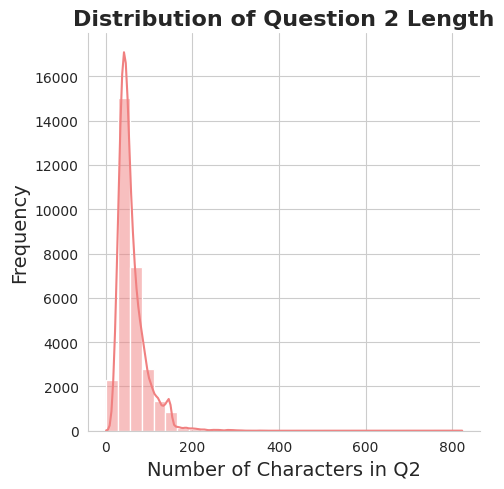

Minimum characters: 1
Maximum characters: 823
Average number of characters: 60


In [41]:

sns.set_style('whitegrid')  # Set the style for Seaborn
sns.displot(new_df['q2_len'], kde=True, color='lightcoral', bins=30)

# Add titles and labels
plt.title('Distribution of Question 2 Length', fontsize=16, weight='bold')
plt.xlabel('Number of Characters in Q2', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Calculate and print the statistics
min_len = new_df['q2_len'].min()
max_len = new_df['q2_len'].max()
avg_len = int(new_df['q2_len'].mean())

print(f'Minimum characters: {min_len}')
print(f'Maximum characters: {max_len}')
print(f'Average number of characters: {avg_len}')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


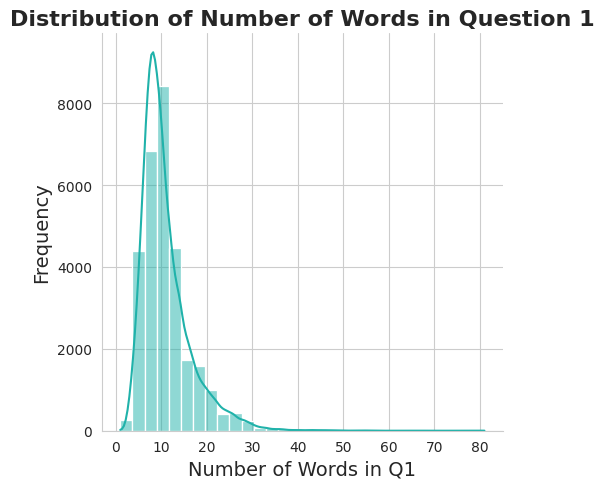

Minimum number of words: 1
Maximum number of words: 81
Average number of words: 10


In [42]:

sns.set_style('whitegrid')  # Set the style for Seaborn
sns.displot(new_df['q1_num_words'], kde=True, color='lightseagreen', bins=30)

# Add titles and labels
plt.title('Distribution of Number of Words in Question 1', fontsize=16, weight='bold')
plt.xlabel('Number of Words in Q1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Calculate and print the statistics
min_words = new_df['q1_num_words'].min()
max_words = new_df['q1_num_words'].max()
avg_words = int(new_df['q1_num_words'].mean())

print(f'Minimum number of words: {min_words}')
print(f'Maximum number of words: {max_words}')
print(f'Average number of words: {avg_words}')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


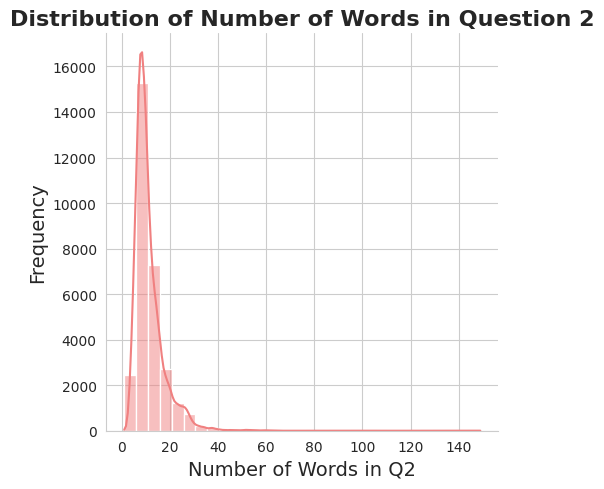

Minimum number of words: 1
Maximum number of words: 149
Average number of words: 11


In [43]:

sns.set_style('whitegrid')  # Set the style for Seaborn
sns.displot(new_df['q2_num_words'], kde=True, color='lightcoral', bins=30)

# Add titles and labels
plt.title('Distribution of Number of Words in Question 2', fontsize=16, weight='bold')
plt.xlabel('Number of Words in Q2', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

# Calculate and print the statistics
min_words = new_df['q2_num_words'].min()
max_words = new_df['q2_num_words'].max()
avg_words = int(new_df['q2_num_words'].mean())

print(f'Minimum number of words: {min_words}')
print(f'Maximum number of words: {max_words}')
print(f'Average number of words: {avg_words}')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


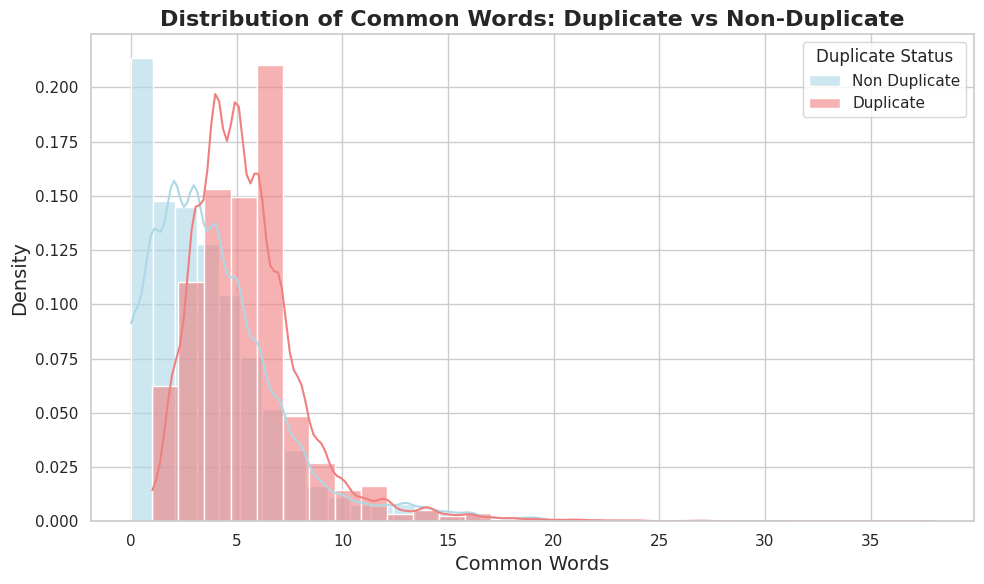

In [44]:
sns.set(style="whitegrid")

# Filter data for duplicate and non-duplicate
non_duplicate_data = new_df[new_df['is_duplicate'] == 0]['common_words']
duplicate_data = new_df[new_df['is_duplicate'] == 1]['common_words']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the histograms for both categories
sns.histplot(non_duplicate_data, color='lightblue', kde=True, label='Non Duplicate', stat='density', bins=30, alpha=0.6)
sns.histplot(duplicate_data, color='lightcoral', kde=True, label='Duplicate', stat='density', bins=30, alpha=0.6)

# Add titles and labels
plt.title('Distribution of Common Words: Duplicate vs Non-Duplicate', fontsize=16, weight='bold')
plt.xlabel('Common Words', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend
plt.legend(title='Duplicate Status')

# Display the plot
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


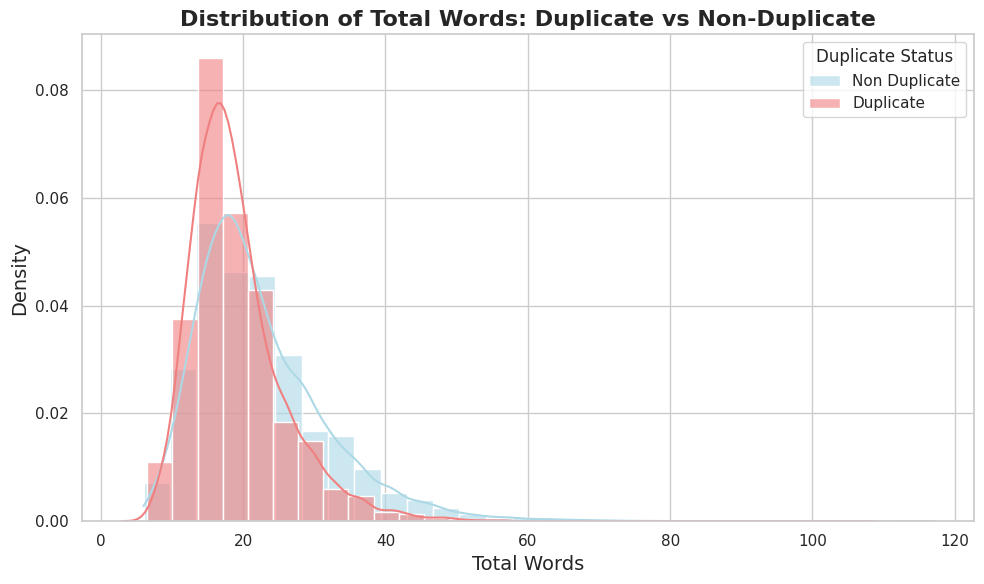

In [45]:

sns.set(style="whitegrid")

# Filter data for duplicate and non-duplicate
non_duplicate_data = new_df[new_df['is_duplicate'] == 0]['total_words']
duplicate_data = new_df[new_df['is_duplicate'] == 1]['total_words']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the histograms for both categories
sns.histplot(non_duplicate_data, color='lightblue', kde=True, label='Non Duplicate', stat='density', bins=30, alpha=0.6)
sns.histplot(duplicate_data, color='lightcoral', kde=True, label='Duplicate', stat='density', bins=30, alpha=0.6)

# Add titles and labels
plt.title('Distribution of Total Words: Duplicate vs Non-Duplicate', fontsize=16, weight='bold')
plt.xlabel('Total Words', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend
plt.legend(title='Duplicate Status')

# Display the plot
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


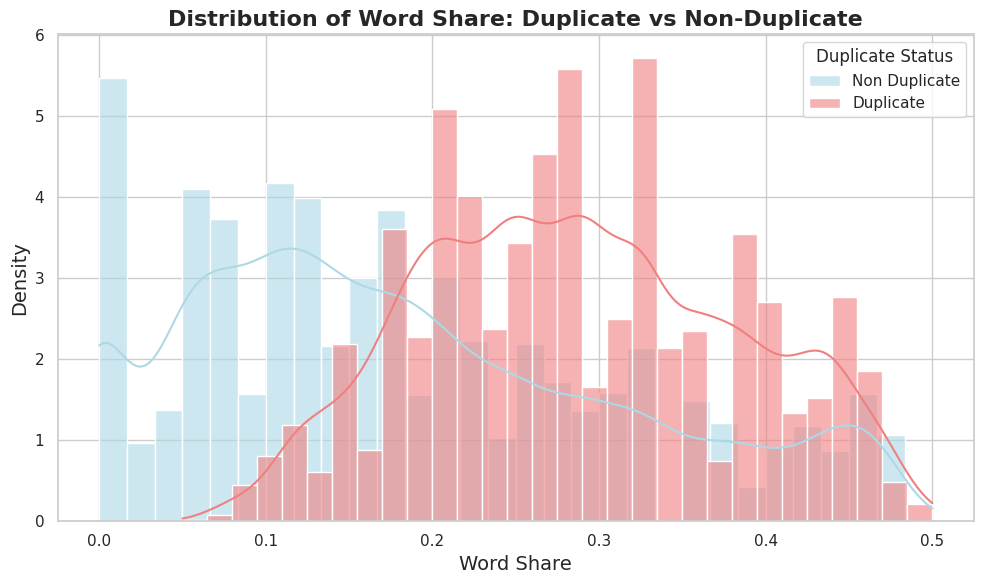

In [46]:

sns.set(style="whitegrid")

# Filter data for duplicate and non-duplicate
non_duplicate_data = new_df[new_df['is_duplicate'] == 0]['word_share']
duplicate_data = new_df[new_df['is_duplicate'] == 1]['word_share']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the histograms for both categories
sns.histplot(non_duplicate_data, color='lightblue', kde=True, label='Non Duplicate', stat='density', bins=30, alpha=0.6)
sns.histplot(duplicate_data, color='lightcoral', kde=True, label='Duplicate', stat='density', bins=30, alpha=0.6)

# Add titles and labels
plt.title('Distribution of Word Share: Duplicate vs Non-Duplicate', fontsize=16, weight='bold')
plt.xlabel('Word Share', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend
plt.legend(title='Duplicate Status')

# Display the plot
plt.tight_layout()
plt.show()


In [47]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])

In [48]:
final_df.head()

is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
21096              0      53      61             9            10   
346194             0      55      53            11            11   
100652             1      33      51             6            11   
56655              0     131     185            23            35   
209541             0      63      40            12             8   

        common_words  total_words  word_share  
21096              5           19        0.26  
346194             4           21        0.19  
100652             3           16        0.19  
56655              6           48        0.12  
209541             3           19        0.16

In [49]:
ques_df

question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   
...                                                   ...   
297210                  How can I learn Chinese language?   
143902  How would I make Andy Warhol's outfit look mod...   
140790                     How do I get a book published?   
348339  Which is better to reduce weight? Aerobics or ...   
40899                  Why did Ash lose the Kalos league?   

                                                question2  
21096   Which types of equipment are used for powder c...  
346194  How can I win an argument in support of Donald...  
100652  What should I do if I don't want to be pessimi...  
56655   How has Quora implemented deep linking so well...  
209541           What are some words with the suffix -or?  
...                                                   ...  
297210  What are some good online tools for learning b...  
143902  How would I give Andy Warhol's outfit a modern...  
140790                How can a new writer get published?  
348339  Is it better to hit the gym or do yoga in orde...  
40899                           Who is Ash Ketchum's dad?  

[30000 rows x 2 columns]

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Ensure ques_df is loaded with 'question1' and 'question2' columns
# ques_df = pd.read_csv('path_to_csv')

# Concatenate question1 and question2 side by side
questions = list(ques_df['question1']) + list(ques_df['question2'])

# Initialize CountVectorizer
cv = CountVectorizer(max_features=3000)

# Transform the questions
transformed_questions = cv.fit_transform(questions).toarray()

# Split the transformed data
q1_arr = transformed_questions[:len(ques_df)]
q2_arr = transformed_questions[len(ques_df):]

# Create DataFrames with matching indices
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)

# Concatenate the DataFrames along the columns
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

# Check the shape of the final DataFrame
print(temp_df.shape)


(30000, 6000)


In [51]:
final_df=pd.concat([final_df,temp_df],axis=1)

In [52]:
final_df.shape

(30000, 6008)

In [53]:
final_df.head()

is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
21096              0      53      61             9            10   
346194             0      55      53            11            11   
100652             1      33      51             6            11   
56655              0     131     185            23            35   
209541             0      63      40            12             8   

        common_words  total_words  word_share  0  1  ...  2990  2991  2992  \
21096              5           19        0.26  0  0  ...     0     0     0   
346194             4           21        0.19  0  0  ...     0     0     0   
100652             3           16        0.19  0  0  ...     0     0     0   
56655              6           48        0.12  0  0  ...     0     0     0   
209541             3           19        0.16  0  0  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
21096      0     0     0     0     0     0     0  
346194     0     0     0     0     0     0     0  
100652     0     0     0     0     0     0     0  
56655      0     0     0     0     0     0     0  
209541     0     0     0     0     0     0     0  

[5 rows x 6008 columns]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7695

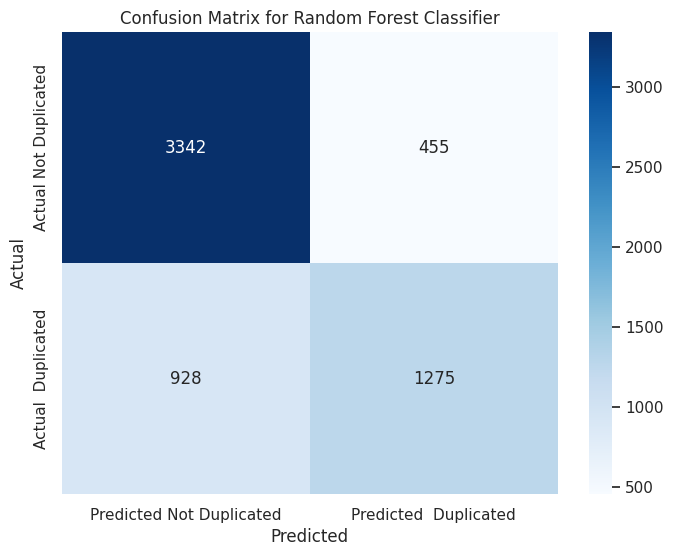

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Duplicated', 'Predicted  Duplicated'], yticklabels=['Actual Not Duplicated', 'Actual  Duplicated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [57]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.767

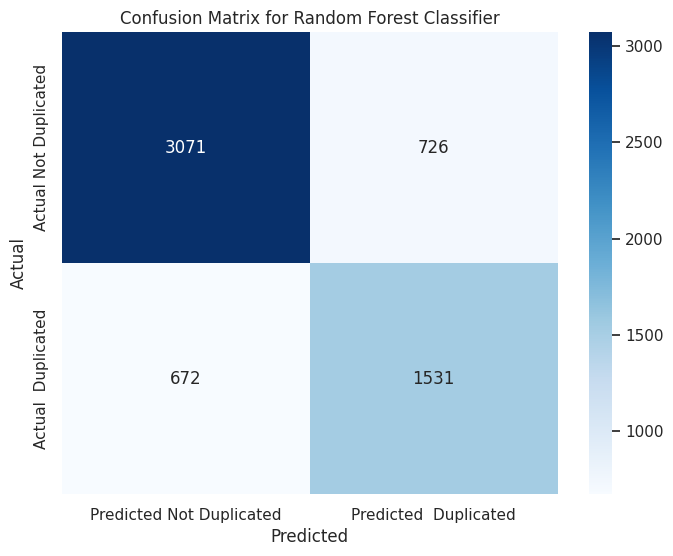

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Duplicated', 'Predicted  Duplicated'], yticklabels=['Actual Not Duplicated', 'Actual  Duplicated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

<a id="conclusion"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>Conclusion</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
Upon comparing the two models, we find that while their accuracy scores are similar, the <strong>Random Forest Classifier</strong> performs better by having fewer <strong>Type I errors</strong> (false positives). This is important because a lower false positive rate means fewer non-duplicate questions are incorrectly labeled as duplicates.  
<br><br>
In summary, the Random Forest model is the better choice due to its more reliable performance, particularly in minimizing false positives. Further optimization can be explored to improve results, but for now, this model provides a strong foundation.
</p>
</div>
</p>
</div>


<a id="advanced-features"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>Advanced Features</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0,80, 0, 0.3); text-align: left; font-size: 110%">
In this section, we will explore a set of advanced features that can help improve the model's performance. These features capture various aspects of the relationship between the two questions. We divide them into three categories:
<br><br>
<strong>1. Token Features</strong>
<ul>
    <li><strong>cwc_min</strong>: The ratio of the number of common words to the length of the smaller question.</li>
    <li><strong>cwc_max</strong>: The ratio of the number of common words to the length of the larger question.</li>
    <li><strong>csc_min</strong>: The ratio of the number of common stop words to the smaller stop word count among the two questions.</li>
    <li><strong>csc_max</strong>: The ratio of the number of common stop words to the larger stop word count among the two questions.</li>
    <li><strong>ctc_min</strong>: The ratio of the number of common tokens to the smaller token count among the two questions.</li>
    <li><strong>ctc_max</strong>: The ratio of the number of common tokens to the larger token count among the two questions.</li>
    <li><strong>last_word_eq</strong>: 1 if the last word in the two questions is the same, 0 otherwise.</li>
    <li><strong>first_word_eq</strong>: 1 if the first word in the two questions is the same, 0 otherwise.</li>
</ul>
<br><br>
<strong>2. Length-Based Features</strong>
<ul>
    <li><strong>mean_len</strong>: The mean of the length of the two questions (number of words).</li>
    <li><strong>abs_len_diff</strong>: The absolute difference between the length of the two questions (number of words).</li>
    <li><strong>longest_substr_ratio</strong>: The ratio of the length of the longest substring between the two questions to the length of the smaller question.</li>
</ul>
<br><br>
<strong>3. Fuzzy Features</strong>
<ul>
    <li><strong>fuzz_ratio</strong>: The <strong>fuzz_ratio</strong> score from fuzzywuzzy.</li>
    <li><strong>fuzz_partial_ratio</strong>: The <strong>fuzz_partial_ratio</strong> score from fuzzywuzzy.</li>
    <li><strong>token_sort_ratio</strong>: The <strong>token_sort_ratio</strong> score from fuzzywuzzy.</li>
    <li><strong>token_set_ratio</strong>: The <strong>token_set_ratio</strong> score from fuzzywuzzy.</li>
</ul>
<br><br>
These features are designed to capture deeper semantic and structural relationships between the two questions, potentially boosting the model's ability to predict duplicates accurately.
</p>
</div>


In [59]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

<a id="preprocess-function"></a>

<div style="background-color: #e3f2fd; font-size:150%; text-align:left; border: 7px solid #0288d1; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: Calibri; border-radius: 20px; padding: 10px; width:95%">
<h1 align="center"><font color=#0277bd><strong>Preprocessing Function</strong></font></h1>
<p style="font-family: Calibri; color: #0277bd; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: left; font-size: 110%">
The <strong>preprocess</strong> function is designed to clean and normalize the text data before it is fed into the model. It performs a series of operations, including:
<ul>
    <li>Converting text to lowercase and removing leading/trailing spaces.</li>
    <li>Replacing special characters like percentages, currency symbols, and mathematical terms with their textual equivalents.</li>
    <li>Decontracting common contractions (e.g., "can't" to "cannot").</li>
    <li>Removing HTML tags and punctuation to standardize the text.</li>
</ul>
These steps ensure that the text data is in a clean, consistent format for analysis and model training.
</p>
</div>


In [60]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [61]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [62]:
new_df.head()

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   

                                                question1  \
21096   What are the types of rubber coating for autom...   
346194  How do I win a debate against a Donald Trump s...   
100652                  How do I become less pessimistic?   
56655   Until they become able to play or until they b...   
209541  What is the technical term for substituting a ...   

                                                question2  is_duplicate  \
21096   Which types of equipment are used for powder c...             0   
346194  How can I win an argument in support of Donald...             0   
100652  What should I do if I don't want to be pessimi...             1   
56655   How has Quora implemented deep linking so well...             0   
209541           What are some words with the suffix -or?             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  total_words  \
21096       53      61             9            10             5           19   
346194      55      53            11            11             4           21   
100652      33      51             6            11             3           16   
56655      131     185            23            35             6           48   
209541      63      40            12             8             3           19   

        word_share  
21096         0.26  
346194        0.19  
100652        0.19  
56655         0.12  
209541        0.16

In [63]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [64]:
new_df.head()

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   

                                                question1  \
21096   what are the types of rubber coating for autom...   
346194  how do i win a debate against a donald trump s...   
100652                   how do i become less pessimistic   
56655   until they become able to play or until they b...   
209541  what is the technical term for substituting a ...   

                                                question2  is_duplicate  \
21096   which types of equipment are used for powder c...             0   
346194  how can i win an argument in support of donald...             0   
100652  what should i do if i do not want to be pessim...             1   
56655   how has quora implemented deep linking so well...             0   
209541            what are some words with the suffix  or             0   

        q1_len  q2_len  q1_num_words  q2_num_words  common_words  total_words  \
21096       53      61             9            10             5           19   
346194      55      53            11            11             4           21   
100652      33      51             6            11             3           16   
56655      131     185            23            35             6           48   
209541      63      40            12             8             3           19   

        word_share  
21096         0.26  
346194        0.19  
100652        0.19  
56655         0.12  
209541        0.16

### Advanced Features

In [65]:

from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [66]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [67]:
new_df.head()

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   

                                                question1  \
21096   what are the types of rubber coating for autom...   
346194  how do i win a debate against a donald trump s...   
100652                   how do i become less pessimistic   
56655   until they become able to play or until they b...   
209541  what is the technical term for substituting a ...   

                                                question2  is_duplicate  \
21096   which types of equipment are used for powder c...             0   
346194  how can i win an argument in support of donald...             0   
100652  what should i do if i do not want to be pessim...             1   
56655   how has quora implemented deep linking so well...             0   
209541            what are some words with the suffix  or             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  total_words  \
21096       53      61             9            10  ...           19   
346194      55      53            11            11  ...           21   
100652      33      51             6            11  ...           16   
56655      131     185            23            35  ...           48   
209541      63      40            12             8  ...           19   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
21096         0.26  0.499988  0.333328  0.749981  0.599988  0.555549   
346194        0.19  0.599988  0.599988  0.399992  0.333328  0.454541   
100652        0.19  0.499975  0.333322  0.666644  0.249997  0.499992   
56655         0.12  0.222220  0.117646  0.624992  0.357140  0.304347   
209541        0.16  0.499975  0.199996  0.333328  0.333328  0.374995   

         ctc_max  last_word_eq  first_word_eq  
21096   0.499995           0.0            0.0  
346194  0.454541           0.0            1.0  
100652  0.249998           1.0            0.0  
56655   0.199999           0.0            0.0  
209541  0.249998           0.0            1.0  

[5 rows x 21 columns]

In [68]:
pip install distance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=290854ca7653ce5d99c7969a50de2df009332d3518a91079a06cdb74ba5e22d0
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance
Note: you may need to restart the kernel to use updated packages.


In [69]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [70]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [71]:
new_df

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   
...        ...     ...     ...   
297210  297210   42970   20865   
143902  143902  227885  227886   
140790  140790   25923  223671   
348339  348339  476892  476893   
40899    40899   73937   73938   

                                                question1  \
21096   what are the types of rubber coating for autom...   
346194  how do i win a debate against a donald trump s...   
100652                   how do i become less pessimistic   
56655   until they become able to play or until they b...   
209541  what is the technical term for substituting a ...   
...                                                   ...   
297210                   how can i learn chinese language   
143902  how would i make andy warhol s outfit look mod...   
140790                      how do i get a book published   
348339  which is better to reduce weight  aerobics or gym   
40899                   why did ash lose the kalos league   

                                                question2  is_duplicate  \
21096   which types of equipment are used for powder c...             0   
346194  how can i win an argument in support of donald...             0   
100652  what should i do if i do not want to be pessim...             1   
56655   how has quora implemented deep linking so well...             0   
209541            what are some words with the suffix  or             0   
...                                                   ...           ...   
297210  what are some good online tools for learning b...             0   
143902  how would i give andy warhol s outfit a modern...             1   
140790                 how can a new writer get published             1   
348339  is it better to hit the gym or do yoga in orde...             0   
40899                            who is ash ketchum s dad             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
21096       53      61             9            10  ...  0.333328  0.749981   
346194      55      53            11            11  ...  0.599988  0.399992   
100652      33      51             6            11  ...  0.333322  0.666644   
56655      131     185            23            35  ...  0.117646  0.624992   
209541      63      40            12             8  ...  0.199996  0.333328   
...        ...     ...           ...           ...  ...       ...       ...   
297210      33      59             6            10  ...  0.166664  0.000000   
143902      54      56            10            11  ...  0.874989  0.999967   
140790      30      35             7             7  ...  0.499988  0.666644   
348339      50      63             9            15  ...  0.428565  0.749981   
40899       34      25             7             5  ...  0.249994  0.000000   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
21096   0.599988  0.555549  0.499995           0.0            0.0   
346194  0.333328  0.454541  0.454541           0.0            1.0   
100652  0.249997  0.499992  0.249998           1.0            0.0   
56655   0.357140  0.304347  0.199999           0.0            0.0   
209541  0.333328  0.374995  0.249998           0.0            1.0   
...          ...       ...       ...           ...            ...   
297210  0.000000  0.166664  0.099999           0.0            0.0   
143902  0.749981  0.909083  0.833326           0.0            1.0   
140790  0.499988  0.571420  0.571420           1.0            1.0   
348339  0.428565  0.666659  0.399997           0.0            0.0   
40899   0.000000  0.166664  0.142855           0.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
21096            1.0       9.5              0.207547  
346194           0.0      11.0              0.245283  
100652           6.0      

In [72]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [73]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [74]:
new_df

id    qid1    qid2  \
21096    21096   39748   39749   
346194  346194  474548  404992   
100652  100652  166915  166916   
56655    56655   99686   99687   
209541  209541  313858  313859   
...        ...     ...     ...   
297210  297210   42970   20865   
143902  143902  227885  227886   
140790  140790   25923  223671   
348339  348339  476892  476893   
40899    40899   73937   73938   

                                                question1  \
21096   what are the types of rubber coating for autom...   
346194  how do i win a debate against a donald trump s...   
100652                   how do i become less pessimistic   
56655   until they become able to play or until they b...   
209541  what is the technical term for substituting a ...   
...                                                   ...   
297210                   how can i learn chinese language   
143902  how would i make andy warhol s outfit look mod...   
140790                      how do i get a book published   
348339  which is better to reduce weight  aerobics or gym   
40899                   why did ash lose the kalos league   

                                                question2  is_duplicate  \
21096   which types of equipment are used for powder c...             0   
346194  how can i win an argument in support of donald...             0   
100652  what should i do if i do not want to be pessim...             1   
56655   how has quora implemented deep linking so well...             0   
209541            what are some words with the suffix  or             0   
...                                                   ...           ...   
297210  what are some good online tools for learning b...             0   
143902  how would i give andy warhol s outfit a modern...             1   
140790                 how can a new writer get published             1   
348339  is it better to hit the gym or do yoga in orde...             0   
40899                            who is ash ketchum s dad             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
21096       53      61             9            10  ...  0.499995   
346194      55      53            11            11  ...  0.454541   
100652      33      51             6            11  ...  0.249998   
56655      131     185            23            35  ...  0.199999   
209541      63      40            12             8  ...  0.249998   
...        ...     ...           ...           ...  ...       ...   
297210      33      59             6            10  ...  0.099999   
143902      54      56            10            11  ...  0.833326   
140790      30      35             7             7  ...  0.571420   
348339      50      63             9            15  ...  0.399997   
40899       34      25             7             5  ...  0.142855   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
21096            0.0            0.0           1.0       9.5   
346194           0.0            1.0           0.0      11.0   
100652           1.0            0.0           6.0       9.0   
56655            0.0            0.0          12.0      29.0   
209541           0.0            1.0           4.0      10.0   
...              ...            ...           ...       ...   
297210           0.0            0.0           4.0       8.0   
143902           0.0            1.0           1.0      11.5   
140790           1.0            1.0           0.0       7.0   
348339           0.0            0.0           6.0      12.0   
40899            0.0            0.0           1.0       6.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
21096               0.207547          52                  50   
346194              0.245283          62                  60   
100652              0.363636          53                  59   
56655               0.068702          33                  39   
209541              0.200000          42                  36   

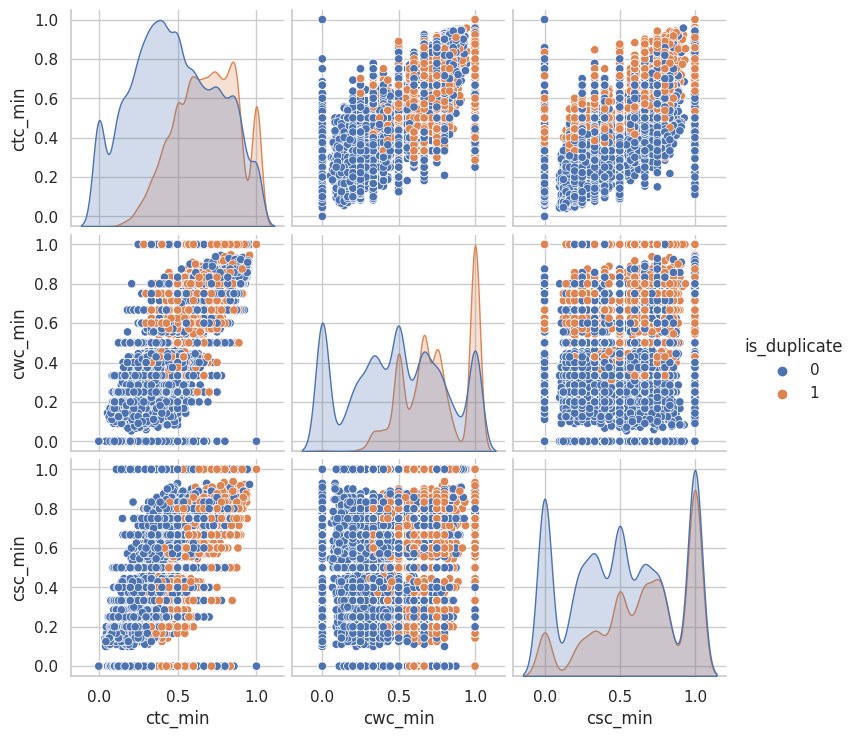

In [75]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

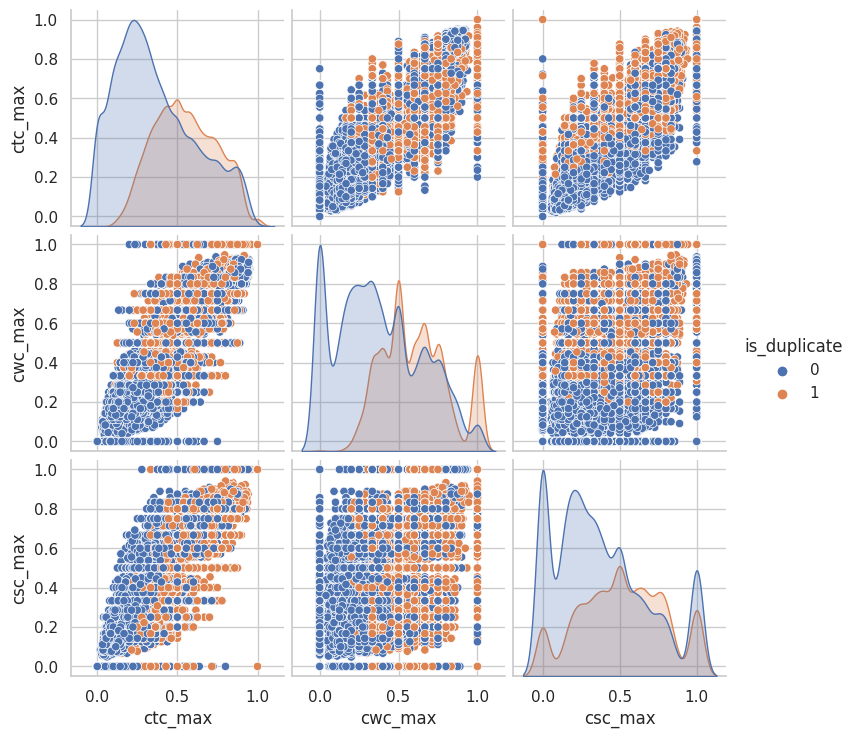

In [76]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

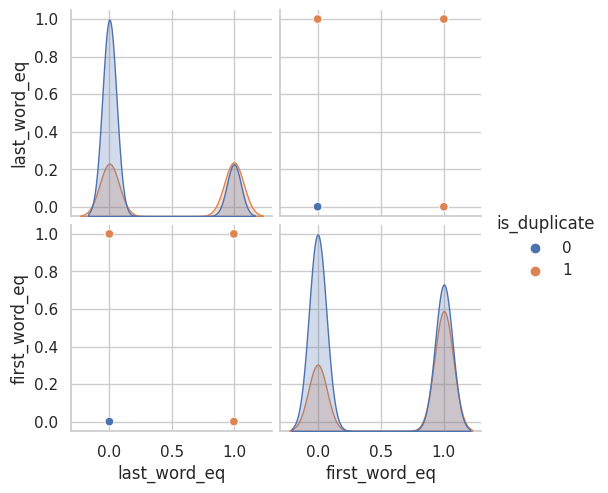

In [77]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

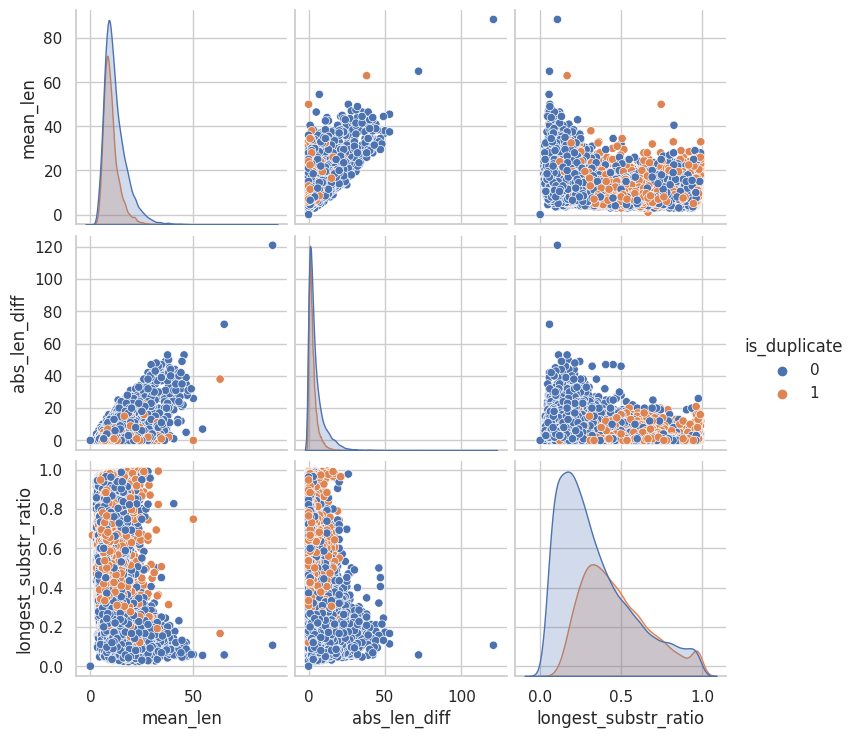

In [78]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

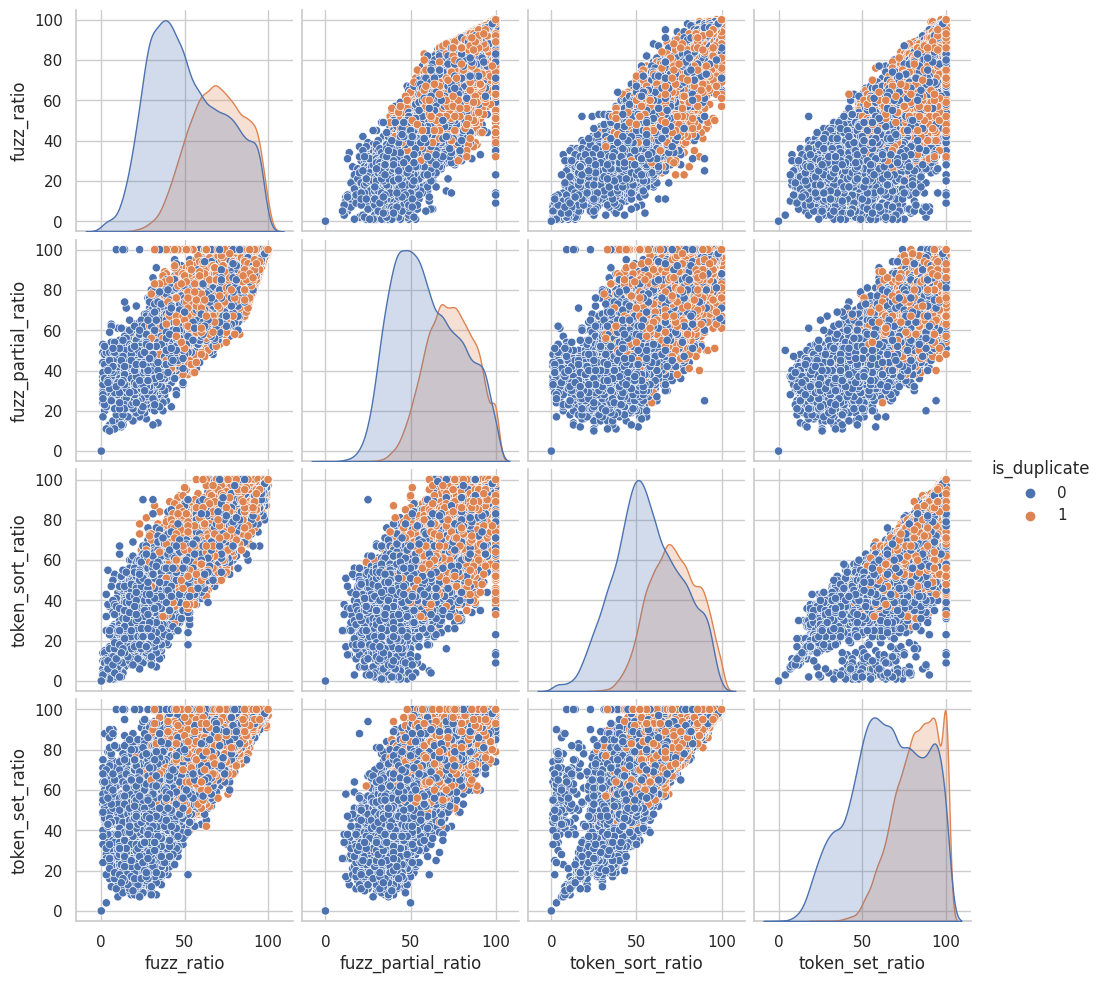

In [79]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [80]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 
'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 
'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [81]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.052s...
[t-SNE] Computed neighbors for 30000 samples in 5.632s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

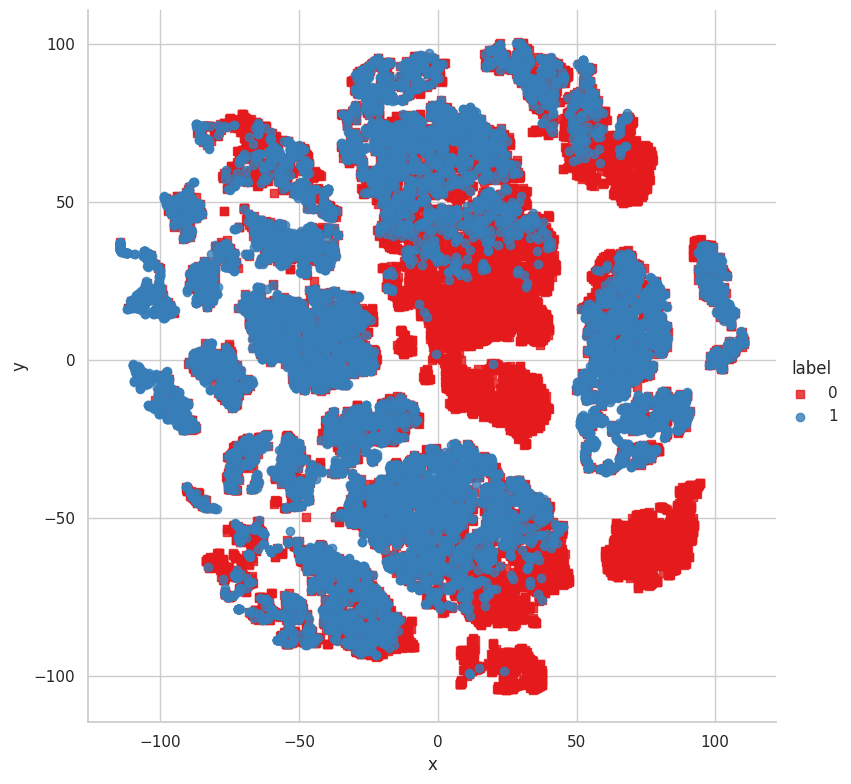

In [82]:
x_df = pd.DataFrame({'x': tsne2d[:, 0], 'y': tsne2d[:, 1], 'label': y})

# Create the plot with Seaborn lmplot
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['s', 'o'])

# Display the plot
plt.show()

In [83]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.053s...
[t-SNE] Computed neighbors for 30000 samples in 5.545s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [84]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [85]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
21096   what are the types of rubber coating for autom...   
346194  how do i win a debate against a donald trump s...   
100652                   how do i become less pessimistic   
56655   until they become able to play or until they b...   
209541  what is the technical term for substituting a ...   

                                                question2  
21096   which types of equipment are used for powder c...  
346194  how can i win an argument in support of donald...  
100652  what should i do if i do not want to be pessim...  
56655   how has quora implemented deep linking so well...  
209541            what are some words with the suffix  or

In [86]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
21096              0      53      61             9            10   
346194             0      55      53            11            11   
100652             1      33      51             6            11   
56655              0     131     185            23            35   
209541             0      63      40            12             8   

        common_words  total_words  word_share   cwc_min   cwc_max  ...  \
21096              5           19        0.26  0.499988  0.333328  ...   
346194             4           21        0.19  0.599988  0.599988  ...   
100652             3           16        0.19  0.499975  0.333322  ...   
56655              6           48        0.12  0.222220  0.117646  ...   
209541             3           19        0.16  0.499975  0.199996  ...   

         ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
21096   0.499995           0.0            0.0           1.0       9.5   
346194  0.454541           0.0            1.0           0.0      11.0   
100652  0.249998           1.0            0.0           6.0       9.0   
56655   0.199999           0.0            0.0          12.0      29.0   
209541  0.249998           0.0            1.0           4.0      10.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
21096               0.207547          52                  50   
346194              0.245283          62                  60   
100652              0.363636          53                  59   
56655               0.068702          33                  39   
209541              0.200000          42                  36   

        token_sort_ratio  token_set_ratio  
21096                 57               63  
346194                74               77  
100652                53               67  
56655                 43               43  
209541                56               63  

[5 rows x 23 columns]

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [88]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [89]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  \
21096              0      53      61             9            10   
346194             0      55      53            11            11   
100652             1      33      51             6            11   
56655              0     131     185            23            35   
209541             0      63      40            12             8   

        common_words  total_words  word_share   cwc_min   cwc_max  ...  2990  \
21096              5           19        0.26  0.499988  0.333328  ...     0   
346194             4           21        0.19  0.599988  0.599988  ...     0   
100652             3           16        0.19  0.499975  0.333322  ...     0   
56655              6           48        0.12  0.222220  0.117646  ...     0   
209541             3           19        0.16  0.499975  0.199996  ...     0   

        2991  2992  2993  2994  2995  2996  2997  2998  2999  
21096      0     0     0     0     0     0     0     0     0  
346194     0     0     0     0     0     0     0     0     0  
100652     0     0     0     0     0     0     0     0     0  
56655      0     0     0     0     0     0     0     0     0  
209541     0     0     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7956666666666666

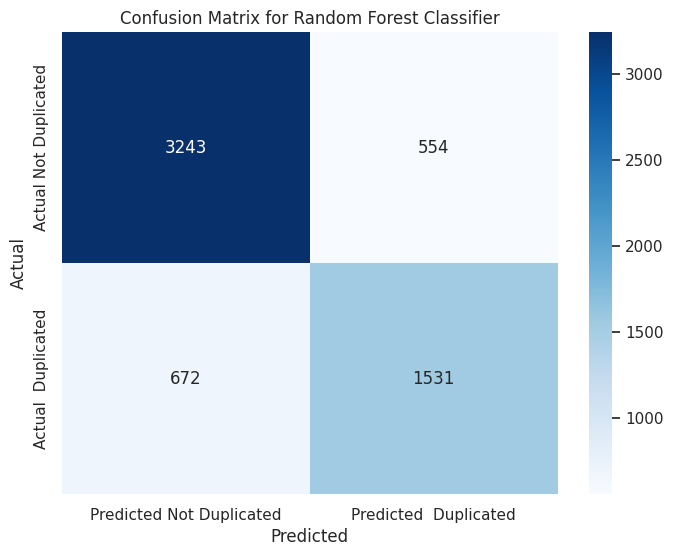

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Duplicated', 'Predicted  Duplicated'], yticklabels=['Actual Not Duplicated', 'Actual  Duplicated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [93]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.794

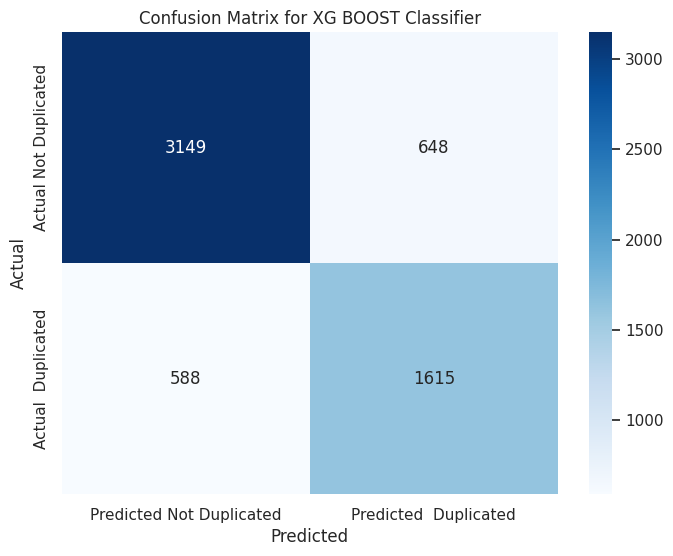

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred1)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Duplicated', 'Predicted  Duplicated'], yticklabels=['Actual Not Duplicated', 'Actual  Duplicated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XG BOOST Classifier')
plt.show()

In [95]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [96]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [97]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [98]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [99]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [100]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [101]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [102]:
rf.predict(query_point_creator(q2,q3))

array([0])

In [103]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

## Submission File

In [104]:
test=pd.read_csv('/kaggle/input/quora-question-pairs/test.csv')

In [105]:
test.head()

test_id                                          question1  \
0        0  How does the Surface Pro himself 4 compare wit...   
1        1  Should I have a hair transplant at age 24? How...   
2        2  What but is the best way to send money from Ch...   
3        3                        Which food not emulsifiers?   
4        4                   How "aberystwyth" start reading?   

                                           question2  
0  Why did Microsoft choose core m3 and not core ...  
1        How much cost does hair transplant require?  
2                      What you send money to China?  
3                                  What foods fibre?  
4                     How their can I start reading?

In [106]:
test.shape

(2345796, 3)

In [107]:
test['question1'][0]

'How does the Surface Pro himself 4 compare with iPad Pro?'

In [108]:
test['question2'][0]

'Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?'

In [109]:
rf.predict(query_point_creator(test['question1'][0],test['question2'][0]))[0]

0

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model
lr.fit(X_train, y_train)

# Predict the target labels for the test data
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.718


In [111]:
submission=pd.DataFrame({
    'id':1,
    'question1':test['question1'][1],
    'question2':test['question2'][1],
    'isdulicated':rf.predict(query_point_creator(test['question1'][1],test['question2'][1]))
})

In [112]:
submission

id                                          question1  \
0   1  Should I have a hair transplant at age 24? How...   

                                     question2  isdulicated  
0  How much cost does hair transplant require?            0

In [113]:
test.head()


test_id                                          question1  \
0        0  How does the Surface Pro himself 4 compare wit...   
1        1  Should I have a hair transplant at age 24? How...   
2        2  What but is the best way to send money from Ch...   
3        3                        Which food not emulsifiers?   
4        4                   How "aberystwyth" start reading?   

                                           question2  
0  Why did Microsoft choose core m3 and not core ...  
1        How much cost does hair transplant require?  
2                      What you send money to China?  
3                                  What foods fibre?  
4                     How their can I start reading?

In [114]:
import pandas as pd


data = []

# Iterate over the range of test DataFrame's rows
for i in range(1000):
    # Create a dictionary for each row
    row_data = {
        'id': i,
        'question1': test['question1'][i],
        'question2': test['question2'][i],
        'isduplicated': rf.predict(query_point_creator(test['question1'][i], test['question2'][i]))
    }
    # Append the row data to the list
    data.append(row_data)

# Create DataFrame from the list of dictionaries
submission = pd.DataFrame(data)

submission


id                                          question1  \
0      0  How does the Surface Pro himself 4 compare wit...   
1      1  Should I have a hair transplant at age 24? How...   
2      2  What but is the best way to send money from Ch...   
3      3                        Which food not emulsifiers?   
4      4                   How "aberystwyth" start reading?   
..   ...                                                ...   
995  995  How is RAU's IAS study circle (Bangalore branc...   
996  996  How NFL, can you try to kick a field goal on a...   
997  997  How do is campus life at St. Thomas College of...   
998  998                   How do I earn money with prefer?   
999  999     How would you out like to spend your last day?   

                                             question2 isduplicated  
0    Why did Microsoft choose core m3 and not core ...          [0]  
1          How much cost does hair transplant require?          [0]  
2                        What you send money to China?          [1]  
3                                    What foods fibre?          [0]  
4                       How their can I start reading?          [1]  
..                                                 ...          ...  
995  How Rau's IAS Study Circle in the Bangalore br...          [1]  
996  What is the point of having good on the NFL go...          [0]  
997  How is campus life layer placements at St Thom...          [0]  
998                                What is on YouTube?          [0]  
999  How would you spend your last countries at MNNIT?          [0]  

[1000 rows x 4 columns]

In [115]:
submission['isduplicated'] = submission['isduplicated'].apply(lambda x: x[0])


In [116]:
submission

id                                          question1  \
0      0  How does the Surface Pro himself 4 compare wit...   
1      1  Should I have a hair transplant at age 24? How...   
2      2  What but is the best way to send money from Ch...   
3      3                        Which food not emulsifiers?   
4      4                   How "aberystwyth" start reading?   
..   ...                                                ...   
995  995  How is RAU's IAS study circle (Bangalore branc...   
996  996  How NFL, can you try to kick a field goal on a...   
997  997  How do is campus life at St. Thomas College of...   
998  998                   How do I earn money with prefer?   
999  999     How would you out like to spend your last day?   

                                             question2  isduplicated  
0    Why did Microsoft choose core m3 and not core ...             0  
1          How much cost does hair transplant require?             0  
2                        What you send money to China?             1  
3                                    What foods fibre?             0  
4                       How their can I start reading?             1  
..                                                 ...           ...  
995  How Rau's IAS Study Circle in the Bangalore br...             1  
996  What is the point of having good on the NFL go...             0  
997  How is campus life layer placements at St Thom...             0  
998                                What is on YouTube?             0  
999  How would you spend your last countries at MNNIT?             0  

[1000 rows x 4 columns]

In [117]:
sub = submission.loc[:, ['id', 'isduplicated']]

In [118]:
sub

id  isduplicated
0      0             0
1      1             0
2      2             1
3      3             0
4      4             1
..   ...           ...
995  995             1
996  996             0
997  997             0
998  998             0
999  999             0

[1000 rows x 2 columns]

In [119]:
sub.to_csv('submission.csv', index=False)